# Применение решающего дерева

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
from IPython.display import Image 
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
data = pd.read_csv(url, sep='\W+', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1


In [4]:
y.head()

0    1
1    2
2    1
3    1
4    2
Name: 24, dtype: int64

In [5]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

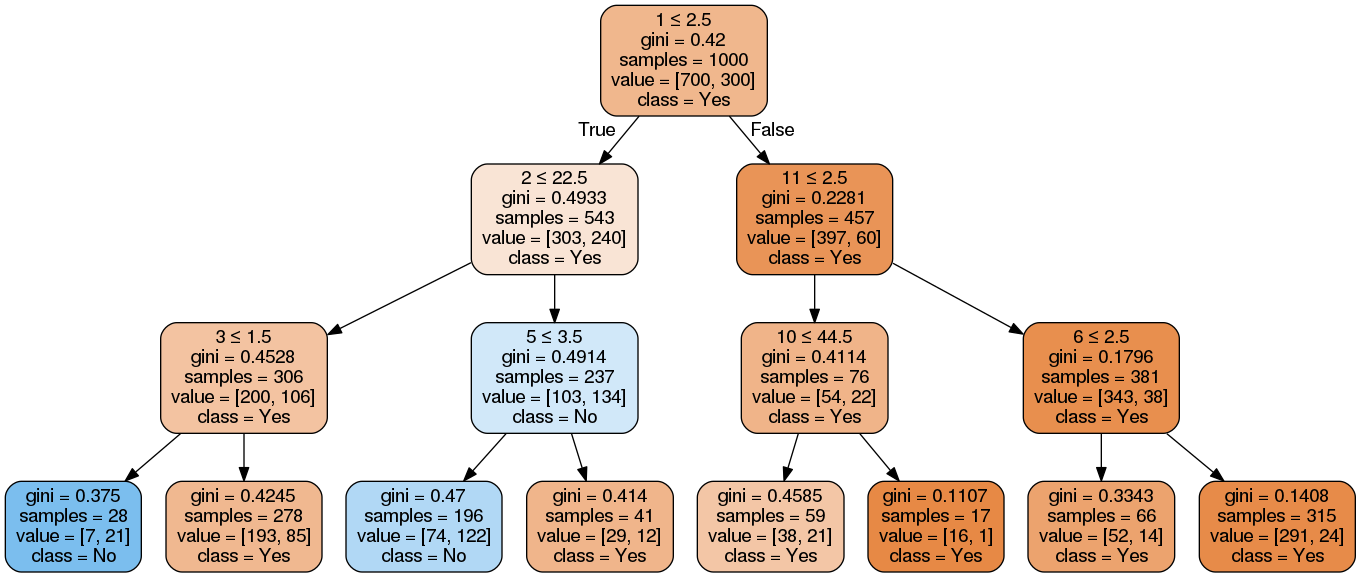

In [6]:
dot_data = tree.export_graphviz(model, out_file="tree.out", feature_names=range(1, 25), 
                               class_names=['Yes', 'No'], filled=True, rounded=True, 
                               special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")
Image(graph.create_png())


$\textbf{Признак 1}$: Баланс счета за последний год. Логично, что если он большой, то кридит выдавать можно.

$\textbf{Признак 2}$: Срок кредита в месяцах.

$\textbf{Признак 5}$: Текущее состояние счета. Если денег мало и кредит выдается на большой срок, то кредит могут и не выдать.


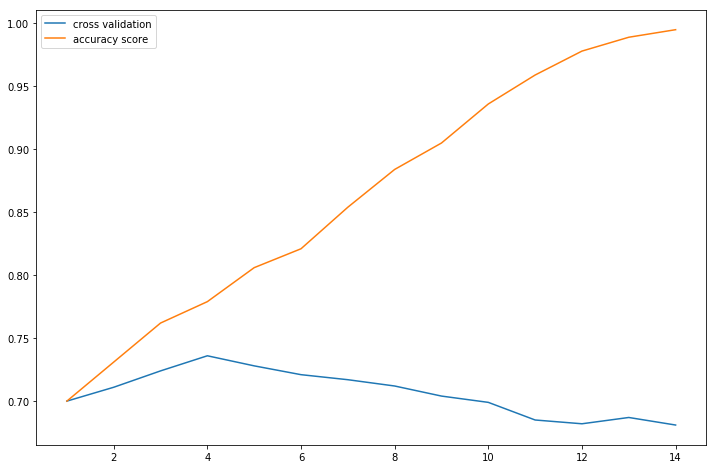

In [7]:
N = 15
cvs = [cross_val_score(tree.DecisionTreeClassifier(max_depth=d), 
                      X, y, cv=5).mean() for d in range(1, N)]
score = [accuracy_score(tree.DecisionTreeClassifier(max_depth=d).fit(X, y).predict(X), y) for d in range(1, N)]

plt.figure(figsize=(12, 8))
plt.plot(range(1, N), cvs, label='cross validation')
plt.plot(range(1, N), score, label='accuracy score')
plt.legend(loc='upper left')
plt.show()

При большой глубине дерево начинает переобучаться.